### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()
#data['car'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
# Cleanup of bad names
data = data.rename(columns={'passanger': 'passengers'})
data['car'] = data['car'].replace('Car that is too old to install Onstar :D', 'before satellite') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passengers            12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


# Heatmap of missing data
This heatmap clearly shows a majority of missing data in the car column. 

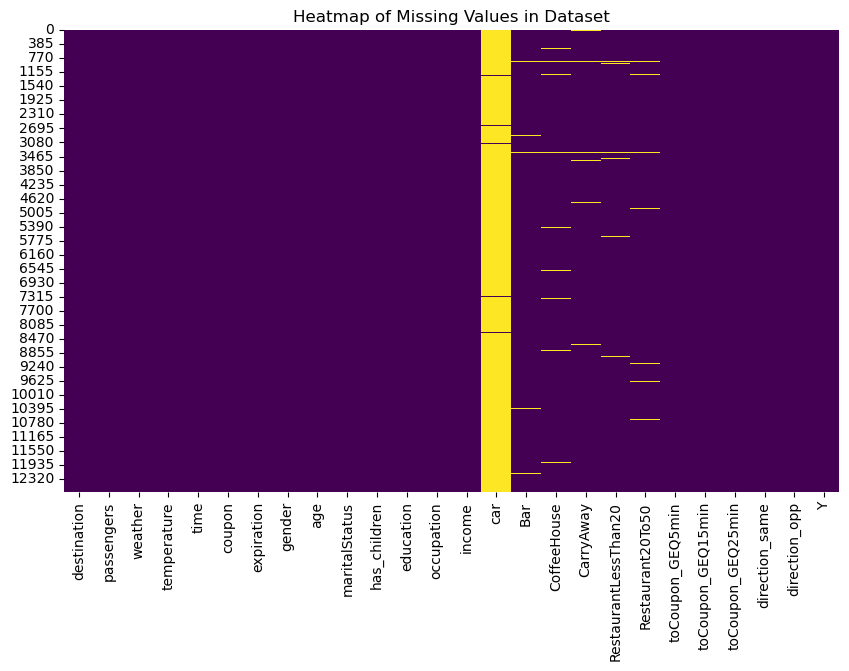

In [7]:
# combine ints into their own db so we can look at it. 
data_ints = data.select_dtypes(include = ['int64'])
data_objects = data.select_dtypes(include=['object'])
#print(data_ints.mean())
#plt.hist(data_ints)
#plt.show()

fig1 = plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Dataset')
plt.show(fig1)

# Histogram of remaining data in car column
This plot shows that the remaning data we have in the car column is in a uniform distribution. The conclusion is therefore that car data is not going to be a determining factor in our analysis and we will exclude it. 

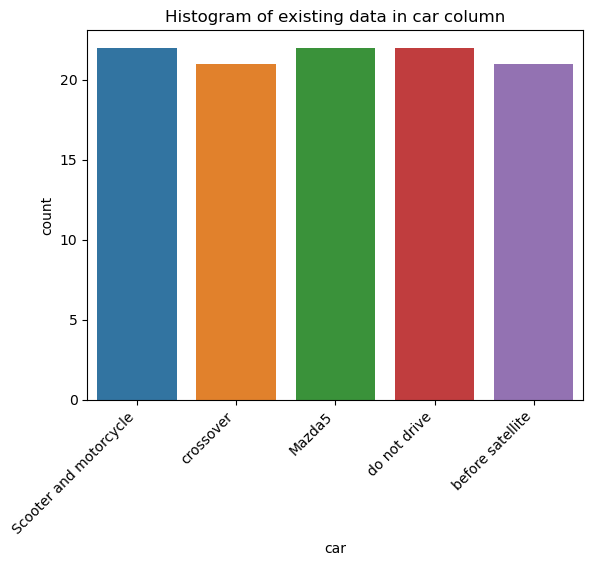

In [8]:
dest_column = data_objects['car']
fig2=sns.countplot(x=dest_column)
plt.xticks(rotation= 45, ha='right')
plt.title('Histogram of existing data in car column')
plt.show(fig2)

In [9]:
columns = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

# Iterate through each column to calculate and print NaN and non-NaN counts
for column in columns:
    nan_count = data[column].isnull().sum()
    non_nan_count = data[column].notnull().sum()
    print(f"{column}: NaN Count = {nan_count}, Non-NaN Count = {non_nan_count}")

Bar: NaN Count = 107, Non-NaN Count = 12577
CoffeeHouse: NaN Count = 217, Non-NaN Count = 12467
CarryAway: NaN Count = 151, Non-NaN Count = 12533
RestaurantLessThan20: NaN Count = 130, Non-NaN Count = 12554
Restaurant20To50: NaN Count = 189, Non-NaN Count = 12495


In [10]:
# Show the percentage of missing data for each of these columns. 
nan_percentage = data[columns].isnull().sum() / len(data) * 100
print(nan_percentage)

Bar                     0.843582
CoffeeHouse             1.710817
CarryAway               1.190476
RestaurantLessThan20    1.024913
Restaurant20To50        1.490066
dtype: float64


## Dropping car column and NaN entries from the data
The percentage of missing data after dropping the car column was less than 2%. Those entries containing NaN values were discarded and a new cleaned dataframe is created. 

In [11]:
# Remove the car column
data_cleaned = data.drop(columns=['car'])
# Drop remaining NaN entries
data_cleaned = data_cleaned.dropna()
data_cleaned


,destination,passengers,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [13]:
#drop_nan = data_cleaned['CarryAway'].dropna()
#drop_nan.value_counts().sum()
#print(drop_nan.to_string())
#data_cleaned['CarryAway'].value_counts().sum()

3. Decide what to do about your missing data -- drop, replace, other...

The percentage of missing data in each of the columns that had it is below 2%. After looking at a few different plots of the columns with missing data in them, I decided that there would be a minimal impact on the dataset if I excluded the entries with missing data. The new dataframe is called data_cleaned

4. What proportion of the total observations chose to accept the coupon? 



In [19]:
accepted = data_cleaned['Y'].mean()
print(f"Proportion of observations that accepted the coupon: {accepted:.2f}")

Proportion of observations that accepted the coupon: 0.57


In [14]:
coup_column = data_cleaned['coupon']
coup_column.unique()
print(coup_column.value_counts().sum())
##null_counts = coup_column.isnull().sum()
##print(null_counts)

12079


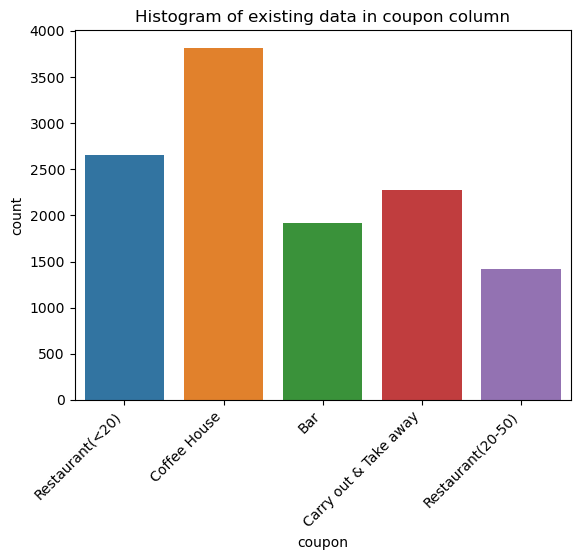

In [15]:

fig3=sns.countplot(x=coup_column)
plt.xticks(rotation= 45, ha='right')
plt.title('Histogram of existing data in coupon column')
plt.show(fig3)

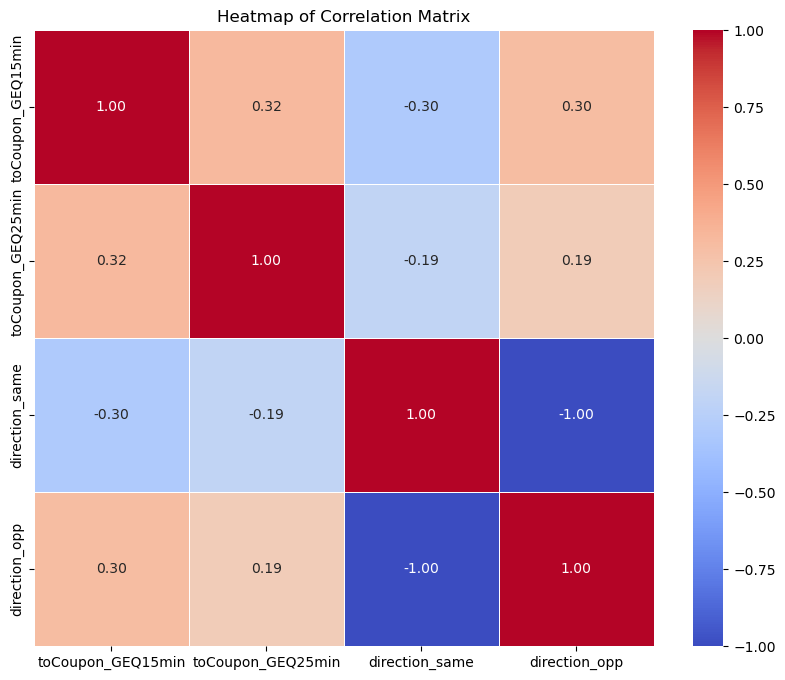

toCoupon_GEQ5min
1    12684
Name: count, dtype: int64
toCoupon_GEQ15min
1    7122
0    5562
Name: count, dtype: int64
toCoupon_GEQ25min
0    11173
1     1511
Name: count, dtype: int64
direction_same
0    9960
1    2724
Name: count, dtype: int64
direction_opp
1    9960
0    2724
Name: count, dtype: int64


In [33]:
data_subset = data_cleaned[['toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']]
corr_matrix = data_subset.corr()

#unique_values = data_cleaned['toCoupon_GEQ5min'].unique()
#print("Unique values in 'toCoupon_GEQ5min':", unique_values)

# Or, check the standard deviation
#std_dev = data_cleaned['toCoupon_GEQ5min'].std()
#print("'toCoupon_GEQ5min' Standard Deviation:", std_dev)

#unique_value = data_cleaned['toCoupon_GEQ5min'].unique()[0]
#print(f"The unique value in 'toCoupon_GEQ5min' is: {unique_value}")
#subset = data_cleaned['toCoupon_GEQ5min']
#print(subset)
#
fig2_5 = plt.figure(figsize=(10, 8)) 

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show(fig2_5)


#min5= data_cleaned['toCoupon_GEQ5min'].sum()
#min15= data_cleaned['toCoupon_GEQ15min'].sum()
#min25= data_cleaned['toCoupon_GEQ25min'].sum()
#same_direction = data_cleaned['direction_same'].sum()
#opposite_direction = data_cleaned['direction_opp'].sum()
#print(min5)
#print(min15)
#print(min25)
#print(same_direction)
#print(opposite_direction)



print(data_cleaned['toCoupon_GEQ5min'].value_counts())
print(data_cleaned['toCoupon_GEQ15min'].value_counts())
print(data_cleaned['toCoupon_GEQ25min'].value_counts())
print(data_cleaned['direction_same'].value_counts())
print(data_cleaned['direction_opp'].value_counts())



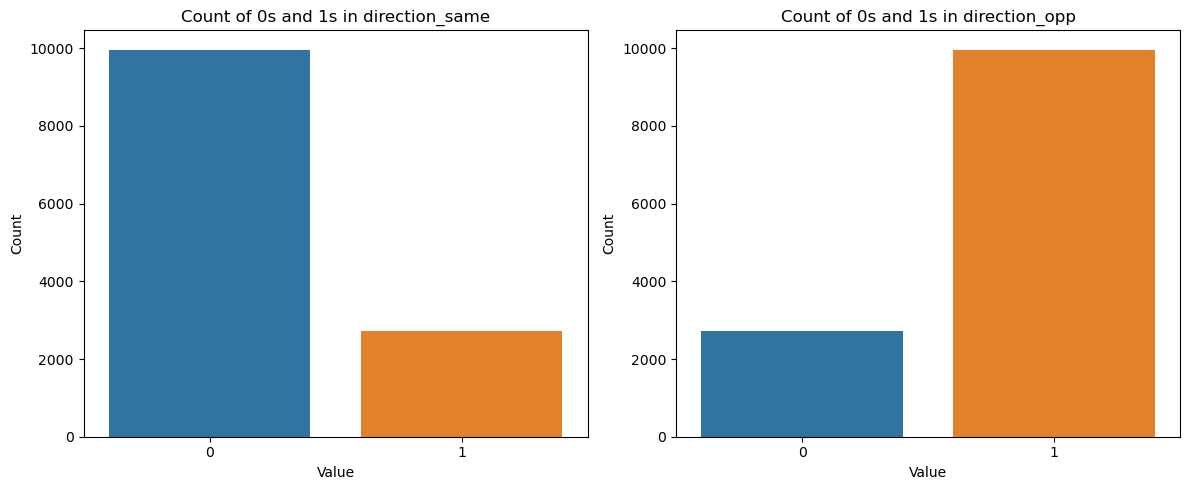

In [20]:
plt.figure(figsize=(12, 5))

# Plot for 'direction_same'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.countplot(x=data_cleaned['direction_same'])
plt.title('Count of 0s and 1s in direction_same')
plt.xlabel('Value')
plt.ylabel('Count')

# Plot for 'direction_opp'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.countplot(x=data_cleaned['direction_opp'])
plt.title('Count of 0s and 1s in direction_opp')
plt.xlabel('Value')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

5. Use a bar plot to visualize the `coupon` column.

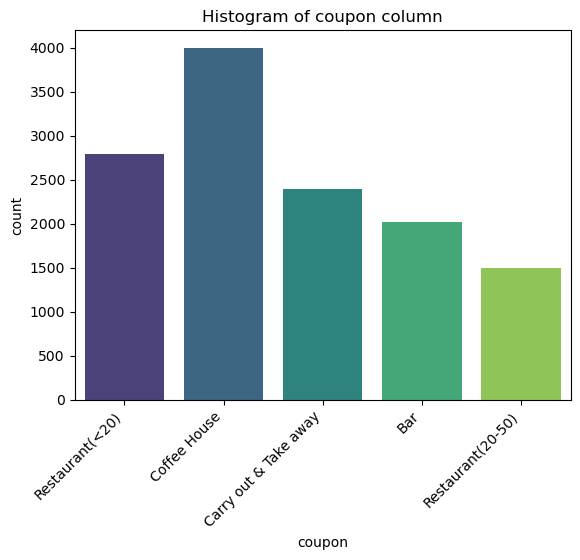

In [21]:

fig3=sns.countplot(x=data_cleaned['coupon'], palette='viridis')
plt.xticks(rotation= 45, ha='right')
plt.title('Histogram of coupon column')
plt.show(fig3)

6. Use a histogram to visualize the temperature column.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


<class 'pandas.core.series.Series'>
RangeIndex: 12684 entries, 0 to 12683
Series name: Bar
Non-Null Count  Dtype 
--------------  ----- 
12577 non-null  object
dtypes: object(1)
memory usage: 99.2+ KB


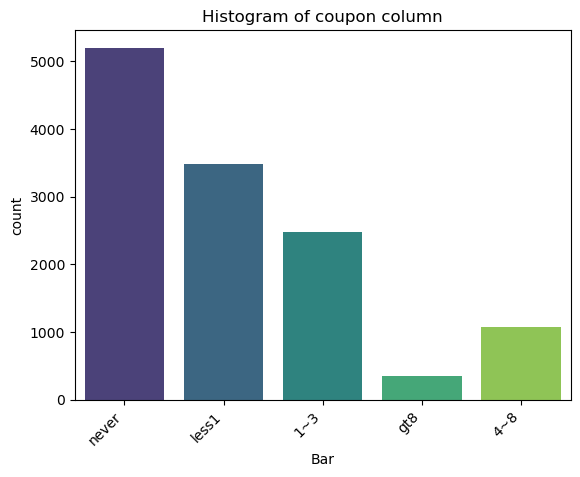

In [31]:
df_bar = data_cleaned['Bar']
df_bar.info()
fig4=sns.countplot(x=data_cleaned['Bar'], palette='viridis')
plt.xticks(rotation= 45, ha='right')
plt.title('Histogram of coupon column')
plt.show(fig4)

2. What proportion of bar coupons were accepted?


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  